# MNIST and ConvNet

In [7]:
%%time
# ~3 mins

import tensorflow as tf
from tensorflow.keras.datasets import mnist

tf.compat.v1.disable_eager_execution()

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') >
                0.998):  # it actually never reaches this hight accuracy
            print("\nReached 99.8% accuracy so cancelling training!")
            self.model.stop_training = True


callbacks = myCallback()
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images,
                                     test_labels) = mnist.load_data()

training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3),
                           activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3),
                           activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3),
                           activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images,
          training_labels,
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[callbacks])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 1280/60000 [..............................] - ETA: 6s - loss: 2.1988 - accuracy: 0.2461

2024-02-11 16:39:14.924966: W tensorflow/c/c_api.cc:305] Operation '{name:'training_2/Adam/conv2d_8/bias/m/Assign' id:668 op device:{requested: '', assigned: ''} def:{{{node training_2/Adam/conv2d_8/bias/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_2/Adam/conv2d_8/bias/m, training_2/Adam/conv2d_8/bias/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


59488/60000 [============================>.] - ETA: 0s - loss: 0.2598 - accuracy: 0.9197

2024-02-11 16:39:19.656849: W tensorflow/c/c_api.cc:305] Operation '{name:'loss_1/mul' id:577 op device:{requested: '', assigned: ''} def:{{{node loss_1/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_1/mul/x, loss_1/dense_4_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


60000/60000 [==============================] - 5s 87us/sample - loss: 0.2590 - accuracy: 0.9201 - val_loss: 0.1053 - val_accuracy: 0.9681
Epoch 2/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0897 - accuracy: 0.9725 - val_loss: 0.0861 - val_accuracy: 0.9735
Epoch 3/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0684 - accuracy: 0.9786 - val_loss: 0.0597 - val_accuracy: 0.9810
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0544 - accuracy: 0.9833 - val_loss: 0.0482 - val_accuracy: 0.9863
Epoch 5/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0457 - accuracy: 0.9860 - val_loss: 0.0541 - val_accuracy: 0.9838
Epoch 6/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0402 - accuracy: 0.9877 - val_loss: 0.0493 - val_accuracy: 0.9863
Epoch 7/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0342 - accuracy: 0.9891 - val_loss

In [8]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 1, 1, 32)         

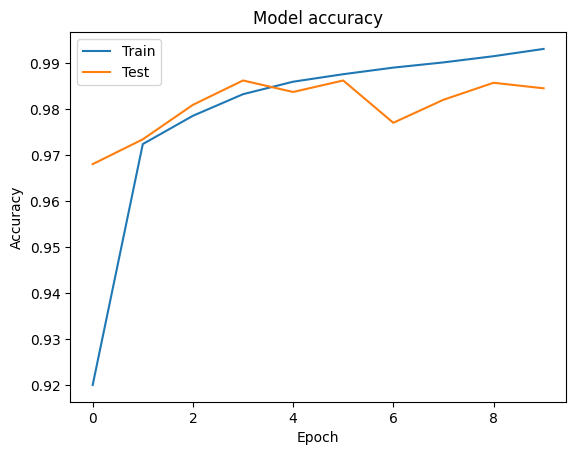

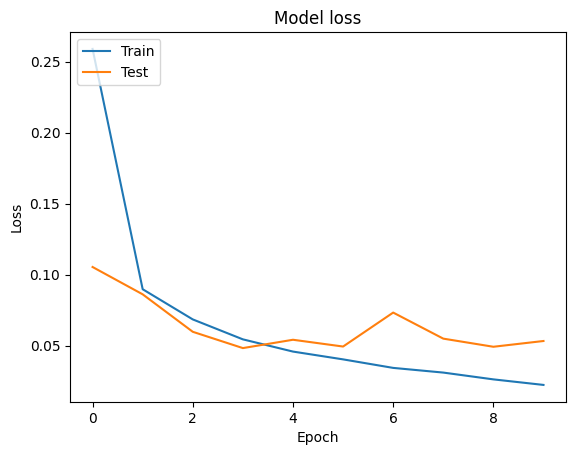

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

history = model.history.history

# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 1, 1, 32)         